## Question 2: OpenAI Taxi-v3 (Monte Carlo methods and TD methods)
Use Taxi-v3 from OpenAI gym. (Pick suitable learning-rate and discount-factor)

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make("Taxi-v3")

In [3]:
learning_rate = 0.1
discount_factor = 0.95
epsilon = 0.1
episodes = 10000

> Simulate the task given a policy

In [4]:
# simuate the taxi environment given a policy

def simulate(policy, max_steps=1000):
    env = gym.make("Taxi-v3", render_mode="human")
    state = env.reset()
    state = state[0]
    # print(state)
    total_reward = 0
    for step in range(max_steps):
        action = policy[state]
        state, reward, done, truncated, info = env.step(action)
        total_reward += reward
        if done:
            env.close()
            break
    return total_reward

### Q-Learning

In [5]:
def get_total_reward(env, policy, gamma):
    total_reward = 0
    state = env.reset()
    state = state[0]
    done = False
    max_iter = 100
    current_iter = 0
    factor = 1
    while not done and current_iter < max_iter:
        action = policy[state]
        next_state, reward, done, truncated, info = env.step(action)
        state = next_state
        total_reward += factor * reward

        factor *= gamma

        current_iter += 1

    return total_reward

def epsilon_greedy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(0, 6)
    else:
        return np.argmax(Q[state])

def Q_learning(learning_rate, gamma, num_episodes, epsilon):
    # initialize Q-matrix
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    Q = np.zeros((num_states, num_actions))
    reward_list = []

    for episode in range(num_episodes):
        # print(episode)
        # initialize state
        state = env.reset()
        state = state[0]
        done = False
        while not done:
            # print(state)
            # choose action
            action = epsilon_greedy(Q, state, epsilon)
            # take action
            next_state, reward, done, truncated, info = env.step(action)
            # update Q-matrix
            Q[state][action] += learning_rate * (reward + gamma * np.max(Q[next_state]) - Q[state][action])
            # update state
            state = next_state

        # find current policy
        policy = [0 for i in range(num_states)]

        for state in range(num_states):
            policy[state] = np.argmax(Q[state])

            #  find total reward from current policy
        total_reward = get_total_reward(env, policy, gamma)
        reward_list.append(total_reward)

    
    # find optimal policy

    policy = [0 for i in range(num_states)]

    for state in range(num_states):
        policy[state] = np.argmax(Q[state])

    return policy, reward_list

In [6]:
Q_learning_policy , Q_learning_reward_list = Q_learning(learning_rate, discount_factor, episodes, epsilon) 

/home/kiranreddybhumireddy/.local/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [7]:
simulate(Q_learning_policy)

3

### SARSA

In [8]:
def get_total_reward(env, policy, gamma):
    total_reward = 0
    state = env.reset()
    state = state[0]
    done = False
    max_iter = 100
    current_iter = 0
    factor = 1
    while not done and current_iter < max_iter:
        action = policy[state]
        next_state, reward, done, truncated, info = env.step(action)
        state = next_state
        total_reward += factor * reward

        factor *= gamma

        current_iter += 1

    return total_reward

def epsilon_greedy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(0, 6)
    else:
        return np.argmax(Q[state])

def SARSA(learning_rate, gamma, num_episodes, epsilon):
    # initialize Q-matrix
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    Q = np.zeros((num_states, num_actions))
    reward_list = []

    for episode in range(num_episodes):
        # print(episode)
        # initialize state
        state = env.reset()
        state = state[0]
        done = False
        while not done:
            # print(state)
            # choose action
            action = epsilon_greedy(Q, state, epsilon)
            # take action
            next_state, reward, done, truncated, info = env.step(action)
            # next action using epsilon greedy
            next_action = epsilon_greedy(Q, next_state, epsilon)
            # update Q-matrix
            Q[state][action] += learning_rate * (reward + gamma * (Q[next_state][next_action]) - Q[state][action])
            # update state
            state = next_state
        
        # find current policy
        policy = [0 for i in range(num_states)]
        for state in range(num_states):
            policy[state] = np.argmax(Q[state])
        
        # calculate reward from current policy

        reward = get_total_reward(env, policy, gamma)
        reward_list.append(reward)
    
    # find optimal policy

    policy = [0 for i in range(num_states)]

    for state in range(num_states):
        policy[state] = np.argmax(Q[state])

    return policy, reward_list

In [9]:
SARSA_policy, SARSA_reward_list = SARSA(learning_rate, discount_factor, episodes, epsilon)

In [10]:
simulate(SARSA_policy)

12

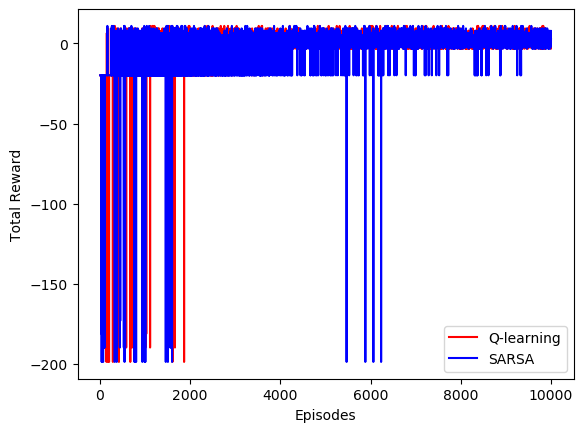

In [11]:
episode_list = [i for i in range(1, episodes + 1)]

plt.plot(episode_list, Q_learning_reward_list, label="Q-learning", color="red")
plt.plot(episode_list, SARSA_reward_list, label="SARSA", color="blue")
plt.xlabel("Episodes")
plt.ylabel("Total Reward")

plt.legend()
plt.show()

> Q-learning converges faster

In [ ]:
episode_list = [i for i in range(1, episodes + 1)]

plt.plot(episode_list, Q_learning_reward_list, label="Q-learning", color="red")
# plt.plot(episode_list, SARSA_reward_list, label="SARSA", color="blue")
plt.xlabel("Episodes")
plt.ylabel("Total Reward")

plt.legend()
plt.show()

In [ ]:
episode_list = [i for i in range(1, episodes + 1)]

# plt.plot(episode_list, Q_learning_reward_list, label="Q-learning", color="red")
plt.plot(episode_list, SARSA_reward_list, label="SARSA", color="blue")
plt.xlabel("Episodes")
plt.ylabel("Total Reward")

plt.legend()
plt.show()

### MONTE CARLO

#### On-policy

In [82]:
env = gym.make("Taxi-v3")

In [85]:
def get_total_reward(env, policy, gamma):
    total_reward = 0
    state = env.reset()
    state = state[0]
    done = False
    max_iter = 100
    current_iter = 0
    factor = 1
    while not done and current_iter < max_iter:
        action = policy[state]
        next_state, reward, done, truncated, info = env.step(action)
        state = next_state
        total_reward += factor * reward

        factor *= gamma

        current_iter += 1

    return total_reward

def epsilon_greedy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(0, 6)
    else:
        return np.argmax(Q[state])


def monte_carlo(gamma, num_episodes, epsilon):
    # initialize Q-matrix
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    Q = np.zeros((num_states, num_actions))

    reward_list = []

    for episode in range(num_episodes):
        store_state_action_reward = []

        # print(episode)
        # initialize state
        state = env.reset()
        state = state[0]
        done = False
        print(episode)
        while not done:
            # iter = iter + 1
            # print(state)
            # choose action
            action = epsilon_greedy(Q, state, epsilon)
            # print(state, action)
            # take action
            next_state, reward, done, truncated, info = env.step(action)

            # store state, action, reward
            store_state_action_reward.append((state, action, reward))
            # update state
            state = next_state

        # print("ok")
        # update Q-matrix
        G = 0
        # initialize a matrix of zeros
        C = np.zeros((num_states, num_actions))
        N = np.zeros((num_states, num_actions))

        for state, action, reward in reversed(store_state_action_reward):
            G = gamma * G + reward
            N[state][action] += 1
            C[state][action] = C[state][action] + G

        for state in range(num_states):
            for action in range(num_actions):
                if N[state][action] != 0:
                    Q[state][action] = C[state][action] / N[state][action]
        
        # find current policy
        policy = [0 for i in range(num_states)]
        for state in range(num_states):
            policy[state] = np.argmax(Q[state])
        
        # calculate reward from current policy
        reward = get_total_reward(env, policy, gamma)
        reward_list.append(reward)


    # find optimal policy

    policy = [0 for i in range(num_states)]

    for state in range(num_states):
        policy[state] = np.argmax(Q[state])

    return policy, reward_list


In [86]:
monte_carlo_policy, monte_carlo_reward_list = monte_carlo(discount_factor, 4000, 0.7)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

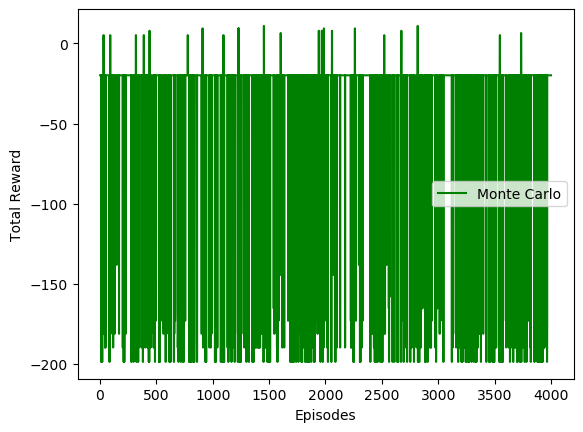

In [88]:
# plot monte carlo reward_list vs episode
episode_list = [i for i in range(1, 4000 + 1)]

# plt.plot(episode_list, Q_learning_reward_list, label="Q-learning", color="red")
# plt.plot(episode_list, SARSA_reward_list, label="SARSA", color="blue")
plt.plot(episode_list, monte_carlo_reward_list, label="Monte Carlo", color="green")
plt.xlabel("Episodes")
plt.ylabel("Total Reward")

plt.legend()
plt.show()

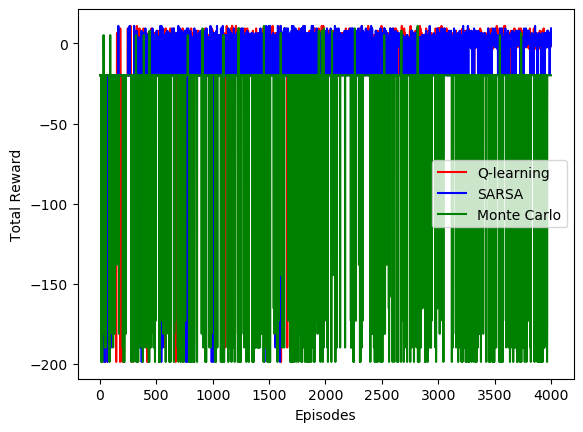

In [90]:
# plot monte carlo reward_list vs episode
episode_list = [i for i in range(1, 4000 + 1)]

plt.plot(episode_list, Q_learning_reward_list[: 4000], label="Q-learning", color="red")
plt.plot(episode_list, SARSA_reward_list[: 4000], label="SARSA", color="blue")
plt.plot(episode_list, monte_carlo_reward_list, label="Monte Carlo", color="green")
plt.xlabel("Episodes")
plt.ylabel("Total Reward")

plt.legend()
plt.show()